# Знакомство с данными и агрегация 

### 1. Загрузите данные за май 2016 года. 

In [1]:
import pandas as pd

In [2]:
# Считываем данные из файла с данными за май 2016 года:
df_file = pd.read_csv('yellow_tripdata_2016-05.csv', header=0, sep=',')

### 2. Проведите фильтрацию

Удалите поездки с:
- нулевой длительностью
- нулевым количеством пассажиров
- нулевым расстоянием поездки по счётчику
- координатами начала, не попадающими в прямоугольник Нью-Йорка

Можно придумать ещё какие-то критерии для фильтрации данных; тем не менее, не стоит применять дополнительные фильтры: начиная с четвёртой недели вам предстоит сравнивать качество ваших прогнозов с качеством прогнозов других слушателей, и, чтобы это сравнение было корректным, нужно, чтобы данные у всех были предобработаны одинаково.

In [3]:
# Посмотрим на размер.
# Имеем 11 836 853 поездки с 19-ю признаками:
df_file.shape

(11836853, 19)

In [4]:
# Посмотрим на первые 5 записей
df_file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [5]:
# Смотрим на типы данных в столбцах:
df_file.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
# Меняем типы столбцов, в которых хранится дата/время посадки/высодки пассажиров, на datetime:
# Выполняется долго!!! 17:22 
df_file.tpep_pickup_datetime = df_file.tpep_pickup_datetime.apply(pd.to_datetime)
df_file.tpep_dropoff_datetime = df_file.tpep_dropoff_datetime.apply(pd.to_datetime)

In [7]:
# Смотрим на типы данных в столбцах:
df_file.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [ ]:
# Удаляем поездки, у которых:
#    1. нулевая длительность
#    2. нулевое количество пассажиров
#    3. нулевое расстояние поездки по счётчику
#    4. координаты начала не попадают в прямоугольник Нью-Йорка

In [8]:
# До удаления имеем 11 836 853 поездок с 19-ю признаками:
df_file.shape 

(11836853, 19)

In [9]:
df_filtered = df_file.loc[(df_file['tpep_dropoff_datetime'] - df_file['tpep_pickup_datetime'] != '00:00:00') &
                              (df_file['passenger_count']!=0) &
                              (df_file['trip_distance']!=0)   &
                              ((df_file['pickup_longitude'] >= -74.25559) & (df_file['pickup_longitude'] <= -73.70001) & 
                               (df_file['pickup_latitude'] >= 40.49612)   & (df_file['pickup_latitude'] <= 40.91553))
                             ]

In [10]:
# После удаления имеем 11 626 521 поездок с 19-ю признаками (т.е. было удалено 210 332 поездок):
df_filtered.shape 

(11626521, 19)

### 3. Агрегация данных 

Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.

In [31]:
# Создаём DataFrame для этого пункта:
df_regs_hours = df_filtered

In [32]:
# Посмотрим на первые 5 записей
df_regs_hours.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region_numbers,tpep_pickup_hour
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233,2016-05-01 00
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180,2016-05-01 00
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180,2016-05-01 00
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173,2016-05-01 00
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130,2016-05-01 00


#### 3.1 Для агрегации по областям необходимо создасть столбец с номером области

Для агрегации по областям необходимо создать столбец с номером области. Для этого, как написано в задании, будем использовать функцию stats.binned_statistic_2d.

Сначала нужно сформировать параметры, которые будут поданы на вход этой функции: 
- значения долготы и широты границ областей;
- значений долготы и широты пунктов начала всех поездок;

##### 3.1.1 Расчёт значений долготы и широты границ областей:

In [33]:
# Создаём пустой список для значений границ областей (по долготе):
binx = []

In [34]:
# Расчёт расстояния между границами областей (по долготе):
delta_x = round((-73.70001 - (-74.25559))/50, 7)
delta_x

0.0111116

In [35]:
# Заполняем список значений границ областей (по долготе).
# Первую и последнюю границы не включаем в список (из-за особенностей функции stats.binned_statistic_2d).
for i in range(50):
    if i==0:
        continue
    binx.append(round((-74.25559 + delta_x*i),7))

In [36]:
len(binx)

49

In [37]:
# Создаём пустой список для значений границ областей (по широте):
biny = []

In [38]:
# Расчёт расстояния между границами областей (по широте):
delta_y = round((40.91553 - (40.49612))/50, 7)
delta_y

0.0083882

In [39]:
# Заполняем список значений границ областей (по широте).
# Первую и последнюю границы не включаем в список (из-за особенностей функции stats.binned_statistic_2d).
for i in range(50):
    if i==0:
        continue
    biny.append(round((40.49612 + delta_y*i),7))

In [40]:
len(biny)

49

##### 3.1.2 Составляем списки значений долготы и широты пунктов начала всех поездок (pickup_longitude и pickup_latitude):

In [41]:
from scipy import stats

In [42]:
# Преобразуем столбцы в списки:
x = df_regs_hours['pickup_longitude'].values.tolist()
y = df_regs_hours['pickup_latitude'].values.tolist()

##### 3.1.3 Формируем столбец с номерами областей

In [43]:
# Вызываем функию:
ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[binx, biny], expand_binnumbers=False)

In [44]:
# Смотрим на тип объекта, содержащего номера областей:
type(ret.binnumber)

numpy.ndarray

In [45]:
# Нумерация начинается с нуля, а нам нужно с единицы:
region_numbers = ret.binnumber + 1

In [46]:
# Создаём столбец - номера регионов:
df_regs_hours['region_numbers'] = region_numbers

C:\Users\1\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [47]:
df_regs_hours.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region_numbers,tpep_pickup_hour
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233,2016-05-01 00
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180,2016-05-01 00
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180,2016-05-01 00
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173,2016-05-01 00
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130,2016-05-01 00
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,...,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30,1231,2016-05-01 00
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,...,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80,1234,2016-05-01 00
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,...,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96,1231,2016-05-01 00
11,1,2016-05-01 00:00:01,2016-05-01 00:15:50,1,5.20,-73.951302,40.774345,1,N,-74.002312,...,1,17.0,0.5,0.5,3.65,0.0,0.3,21.95,1384,2016-05-01 00
12,2,2016-05-01 00:00:01,2016-05-01 00:13:28,5,4.75,-73.983498,40.726082,1,N,-74.014130,...,1,16.0,0.5,0.5,3.46,0.0,0.3,20.76,1228,2016-05-01 00


#### 3.2 Для агрегации по часам необходимо создасть столбец с времем начала поездки (tpep_pickup_datetime) без минут и секунд:

In [48]:
import datetime

In [49]:
# Функция будет отрезать минуты и секунды, оставлять год, месяц, день, час:
def cut_min_sec(pickup_datetime):
    return datetime.datetime.strftime(pickup_datetime, '%Y-%m-%d %H')

In [50]:
# Создаём столбец - дата/время без минут и секунд:
df_regs_hours['tpep_pickup_hour'] = df_regs_hours.tpep_pickup_datetime.apply(cut_min_sec)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [51]:
df_regs_hours.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region_numbers,tpep_pickup_hour
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233,2016-05-01 00
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180,2016-05-01 00
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180,2016-05-01 00
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173,2016-05-01 00
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130,2016-05-01 00
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,...,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30,1231,2016-05-01 00
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,...,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80,1234,2016-05-01 00
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,...,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96,1231,2016-05-01 00
11,1,2016-05-01 00:00:01,2016-05-01 00:15:50,1,5.20,-73.951302,40.774345,1,N,-74.002312,...,1,17.0,0.5,0.5,3.65,0.0,0.3,21.95,1384,2016-05-01 00
12,2,2016-05-01 00:00:01,2016-05-01 00:13:28,5,4.75,-73.983498,40.726082,1,N,-74.014130,...,1,16.0,0.5,0.5,3.46,0.0,0.3,20.76,1228,2016-05-01 00


#### 3.3 Проводим агрегацию

In [52]:
# Теперь можно провести агрегацию по времени и номеру области:
df_aggr = df_regs_hours.groupby(['tpep_pickup_hour', 'region_numbers']).size().to_frame('number_of_lines').reset_index()

In [53]:
# Смотрим, сколько строк получилось
df_aggr.shape

(141762, 3)

### 4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок

In [54]:
df_aggr.head()

,tpep_pickup_hour,region_numbers,number_of_lines
0,2016-05-01 00,1015,1
1,2016-05-01 00,1017,1
2,2016-05-01 00,1029,3
3,2016-05-01 00,1030,1
4,2016-05-01 00,1033,4


### 5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building 

In [ ]:
# Координаты Empire State Building: 
#    40 44'54.36'' N
#    73 59'08.36'' W

In [ ]:
# Рассчитаем эти координаты в десятичном формате:

In [55]:
# Долгота
esb_longitude = []

In [56]:
esb_longitude.append(-(73. + 59./60 + 8.36/3600))
esb_longitude

[-73.98565555555555]

In [57]:
# Широта
esb_latitude = []

In [58]:
esb_latitude.append(40. + 44./60 + 54.36/3600)
esb_latitude

[40.74843333333333]

In [ ]:
# Определим номер ячейки, в которой находится Empire State Building:

In [59]:
esb_ret = stats.binned_statistic_2d(esb_longitude, esb_latitude, None, 'count', bins=[binx, biny], expand_binnumbers=False)

In [60]:
# Нумерация начинается с нуля, а нам нужно с единицы:
esb_region_numbers = esb_ret.binnumber + 1

In [61]:
# Empire State Building находится в области 1231:
esb_region_numbers

array([1231])

In [ ]:
# Строим график

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Отбираем записи в области, содержащей Empire State Building
df_aggr_esb = df_aggr[df_aggr.region_numbers == 1231]

In [64]:
# Количество записей = 744, это количество часов в мае (24 * 31), значит, в каждом часе была хотя бы одна поездка:
df_aggr_esb.shape

(744, 3)

In [65]:
import numpy as np

In [66]:
x_axis = range(744)

In [67]:
type(x_axis)

list

In [68]:
y_axis = df_aggr_esb['number_of_lines'].tolist()

In [69]:
type(y_axis)

list

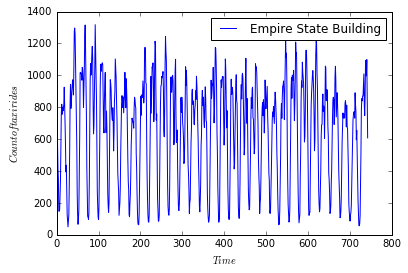

In [70]:
plt.plot(x_axis, y_axis, label = 'Empire State Building')
plt.ylabel('$Count of taxi rides$')
plt.xlabel('$Time$')
plt.legend()

### 6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки

In [ ]:
# Количество пар "час-область", для которых не было совершено ни одной поездки, можно рассчитать следующим образом.
# Общее количество таких пар равно произведению количества часов в мае (744) на количество областей (2500) и равно:
# 744 х 2500 = 1 860 000 шт.

In [ ]:
# Из этого  значения нужно вычесть количество пар, в которых поездки были. Это количество равно количеству строк в 
# df_aggr (141 762 шт.), который был сформирован выше в пункте 3.3.

In [ ]:
# Получаем значение 1 718 238 шт.:

In [71]:
744 * 2500 - len(df_aggr)

1718238

In [ ]:
# Это значение можно проверить следующим образом.

In [72]:
# Проводим группировку по полю 'tpep_pickup_hour' (часы). 
#
# В результате получаем DataFrame, в котором для каждой пары "час-область" будут рассчитаны количества областей, в которых 
# были поездки в течение этого часа; при дальнейшем подсчёте каждое из этих значений нужно будет вычитать из 2500 (из общего 
# количества областей):

df_aggr_hours = df_aggr.groupby(['tpep_pickup_hour']).size().to_frame('regs_count_within_hour').reset_index()

In [73]:
df_aggr_hours.head()

,tpep_pickup_hour,regs_count_within_hour
0,2016-05-01 00,225
1,2016-05-01 01,222
2,2016-05-01 02,221
3,2016-05-01 03,206
4,2016-05-01 04,214


In [74]:
df_aggr_hours.shape

(744, 2)

In [ ]:
# Проводим расчёт пар "час-область", для которых не было совершено ни одной поездки

In [75]:
empty_cells = 0

In [76]:
for index, row in df_aggr_hours.iterrows():
    empty_cells = empty_cells + (2500 - row['regs_count_within_hour'])
        
print(empty_cells)

1718238


In [199]:
# Получаем то же самое значение: 1 718 238 шт.